### **Buscar el time series más corto**

In [2]:
min_samples = 832

### **Hacer reshape de todos los experimentos a tener 832 (Todos los time series)**

In [11]:
import numpy as np
import pandas as pd
from glob import glob
from scipy import signal

size = 832
files = glob('Z:\Descargas\composite\CSV_DATA\*.csv')
for file in files:
    df = pd.read_csv(file)
    col_names = ('Flow rate', 'Pressure')    
    cols = [col for col in df if col.endswith(col_names)]    
    resampled_df = pd.DataFrame(signal.resample(df[cols], min_samples), columns=cols)
    resampled_df['TOTAL_QUALITY'] = df['TOTAL_QUALITY']
    resampled_df.to_csv(file.replace('CSV_DATA', 'deepl\CSV_DATA_RESAMPLED'), index=False)

### **Generar dataset de train (15% de los correctos concatenados uno debajo del otro)**

In [1]:
import numpy as np
import pandas as pd
from glob import glob

files = glob('Z:\Descargas\composite\deepl\CSV_DATA_RESAMPLED\*.csv')
np.random.shuffle(files)

n_files = int(len(files) * 0.15) # 15% de los datos correctos

df_list = []

for file in files:
    df = pd.read_csv(file)
    if df.iloc[:,-1][0] == 1:
        df_list.append(df)
    if len(df_list) == n_files:
        break
        
print(len(df_list))

1502


In [2]:
df = pd.concat(df_list)
df = df.iloc[:,:-1]
df

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,6.526294e-07,2585.853095,2703.955058,2707.838233,2627.174184,2433.710516,2114.439825,3643.915977,3022.047785,2894.180464,...,3003.967620,2835.524454,2545.776738,2296.678284,2768.934169,3033.021141,3399.631334,3693.757629,3151.650293,2600.188711
1,7.284711e-07,-916.167179,-963.065488,-969.586655,-943.701628,-871.615555,-752.836453,-1279.440811,-1069.082582,-1031.735679,...,-1078.314785,-1011.714664,-905.758594,-813.636595,-981.203380,-1076.806938,-1207.715051,-1307.504368,-1119.371669,-921.871971
2,7.293478e-07,521.014480,550.878746,557.967847,545.211297,502.027859,430.760842,720.932723,606.583030,590.391340,...,622.697172,580.556334,518.076362,463.010809,552.289445,610.562035,688.134370,743.782990,639.320528,525.223340
3,8.834509e-07,-355.329613,-378.031829,-385.356557,-378.154211,-347.128735,-295.773850,-486.817711,-412.627490,-405.296747,...,-431.741571,-399.897080,-355.620484,-316.054097,-371.865091,-414.752883,-470.200007,-507.520092,-438.166079,-358.972027
4,1.070706e-06,266.127186,284.978086,292.436828,288.245288,263.774607,223.122363,360.710595,308.207772,305.672975,...,328.989485,302.680346,268.184410,236.942128,274.872249,309.424538,352.893111,380.293804,329.870958,269.454399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,2.500483e-09,57496.545227,67696.574737,72409.010219,74579.492248,74569.205107,74469.840125,61824.999088,69818.330502,74616.505032,...,82582.817917,74661.622614,67620.407876,62801.341130,84028.734365,94720.062056,105439.178151,93251.529184,76397.269060,60817.883543
828,-1.150059e-09,56702.569420,66775.916387,71439.182325,73616.962031,73662.863429,73567.022860,60925.502150,68823.369540,73558.740080,...,81545.411733,74033.391139,67340.119615,62756.496854,82802.383669,93348.194077,103937.586208,92144.976924,75892.584297,60981.115283
829,-9.752949e-10,58143.434955,68542.348138,73438.317545,75772.138902,75880.381494,75835.745724,62344.120613,70499.860341,75477.462451,...,83902.643500,76438.212600,69794.272287,65257.916640,84720.027674,95517.368967,106351.723902,94593.402266,78378.550920,63584.818390
830,4.819318e-09,56685.982057,66847.470881,71635.866952,73951.532142,74124.566887,74087.659752,60724.485520,68695.408717,73559.240871,...,81912.585250,74957.628916,68755.241021,64527.477500,82498.356595,93032.064354,103616.574369,92399.172262,76992.674382,63055.307201


In [3]:
df.to_csv('Z:\\Descargas\\composite\\deepl\\train_correct.csv', index=False)

### **Normalizar los datos con StandardScaler**

In [4]:
import pandas as pd

train = pd.read_csv('Z:\\Descargas\\composite\\deepl\\train_correct.csv')
train.shape

(1249664, 29)

In [5]:
train

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,6.526294e-07,2585.853095,2703.955058,2707.838233,2627.174184,2433.710516,2114.439825,3643.915977,3022.047785,2894.180464,...,3003.967620,2835.524454,2545.776738,2296.678284,2768.934169,3033.021141,3399.631334,3693.757629,3151.650293,2600.188711
1,7.284711e-07,-916.167179,-963.065488,-969.586655,-943.701628,-871.615555,-752.836453,-1279.440811,-1069.082582,-1031.735679,...,-1078.314785,-1011.714664,-905.758594,-813.636595,-981.203380,-1076.806938,-1207.715051,-1307.504368,-1119.371669,-921.871971
2,7.293478e-07,521.014480,550.878746,557.967847,545.211297,502.027859,430.760842,720.932723,606.583030,590.391340,...,622.697172,580.556334,518.076362,463.010809,552.289445,610.562035,688.134370,743.782990,639.320528,525.223340
3,8.834509e-07,-355.329613,-378.031829,-385.356557,-378.154211,-347.128735,-295.773850,-486.817711,-412.627490,-405.296747,...,-431.741571,-399.897080,-355.620484,-316.054097,-371.865091,-414.752883,-470.200007,-507.520092,-438.166079,-358.972027
4,1.070706e-06,266.127186,284.978086,292.436828,288.245288,263.774607,223.122363,360.710595,308.207772,305.672975,...,328.989485,302.680346,268.184410,236.942128,274.872249,309.424538,352.893111,380.293804,329.870958,269.454399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249659,2.500483e-09,57496.545227,67696.574737,72409.010219,74579.492248,74569.205107,74469.840125,61824.999088,69818.330502,74616.505032,...,82582.817917,74661.622614,67620.407876,62801.341130,84028.734365,94720.062056,105439.178151,93251.529184,76397.269060,60817.883543
1249660,-1.150059e-09,56702.569420,66775.916387,71439.182325,73616.962031,73662.863429,73567.022860,60925.502150,68823.369540,73558.740080,...,81545.411733,74033.391139,67340.119615,62756.496854,82802.383669,93348.194077,103937.586208,92144.976924,75892.584297,60981.115283
1249661,-9.752949e-10,58143.434955,68542.348138,73438.317545,75772.138902,75880.381494,75835.745724,62344.120613,70499.860341,75477.462451,...,83902.643500,76438.212600,69794.272287,65257.916640,84720.027674,95517.368967,106351.723902,94593.402266,78378.550920,63584.818390
1249662,4.819318e-09,56685.982057,66847.470881,71635.866952,73951.532142,74124.566887,74087.659752,60724.485520,68695.408717,73559.240871,...,81912.585250,74957.628916,68755.241021,64527.477500,82498.356595,93032.064354,103616.574369,92399.172262,76992.674382,63055.307201


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler().fit(train)
train = scaler.transform(train)
train.shape

(1249664, 29)

### Definir modelo LSTM-AutoEncoder

In [7]:
# reshape input into [samples, timesteps, features]

n_samples = 1502
n_steps = 832
n_features = train.shape[1]
train = train.reshape((n_samples, n_steps, n_features))

train.shape

(1502, 832, 29)

In [ ]:
# https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network

In [8]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential([
    layers.LSTM(16, activation='relu', return_sequences=True, input_shape=(train.shape[1], train.shape[2])),
    layers.LSTM(8, activation='relu', return_sequences=False),
    layers.RepeatVector(train.shape[1]),
    layers.LSTM(8, activation='relu', return_sequences=True),
    layers.LSTM(16, activation='relu', return_sequences=True),
    layers.TimeDistributed(layers.Dense(train.shape[2]))
])

model.compile(optimizer='adam', loss='mae')

early_stop = [EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None)]

history = model.fit(train, train, callbacks=early_stop, epochs=10, batch_size=64, validation_split=0.1)

Train on 1351 samples, validate on 151 samples
Epoch 1/10
1351/1351 [==============================] - 43s 32ms/sample - loss: 0.1529 - val_loss: 0.1437
Epoch 2/10
1351/1351 [==============================] - 40s 30ms/sample - loss: 0.1359 - val_loss: 0.1302
Epoch 3/10
1351/1351 [==============================] - 39s 29ms/sample - loss: 0.1228 - val_loss: 0.1190
Epoch 4/10
1351/1351 [==============================] - 40s 29ms/sample - loss: 0.1145 - val_loss: 0.1130
Epoch 5/10
1351/1351 [==============================] - 40s 30ms/sample - loss: 0.1102 - val_loss: 0.1104
Epoch 6/10
1351/1351 [==============================] - 39s 29ms/sample - loss: 0.1085 - val_loss: 0.1098
Epoch 7/10
1351/1351 [==============================] - 40s 29ms/sample - loss: 0.1082 - val_loss: 0.1094
Epoch 8/10
1351/1351 [==============================] - 42s 31ms/sample - loss: 0.1079 - val_loss: 0.1092
Epoch 9/10
1351/1351 [==============================] - 41s 30ms/sample - loss: 0.1076 - val_loss: 0.1089

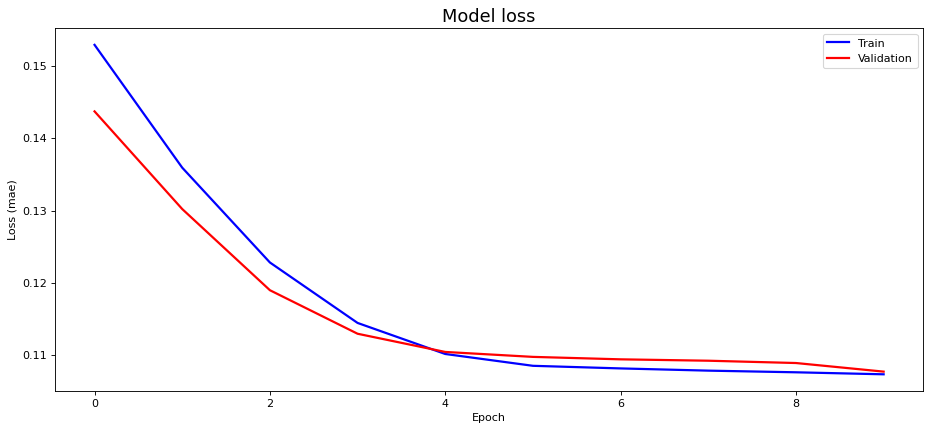

In [9]:
from matplotlib import pyplot as plt

# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

### Calcular threshold

In [10]:
pred_train = model.predict(train)
pred_train.shape

(1502, 832, 29)

In [11]:
import numpy as np
mean1 = np.mean(np.abs(pred_train-train), axis=1)
mean2 = np.mean(mean1, axis=1)

threshold = mean2.mean()+3*mean2.std()
threshold

0.1591094233489666